<a href="https://colab.research.google.com/github/sabahomarkm/Improved-Cyber-Attack-Detection-using-Machine-Learning/blob/main/svm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 30kB/s 


In [2]:
import pandas as pd
import numpy as np
#importing needed libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('/content/drive/MyDrive/Improved Cyber Attack Detection using Machine Learning/Dataset/Hz-CTU13_1.csv')
df.head()

,src,src_port,dst,dst_port,original_dataset,original_label,event_generator,event_signature,event_priority,ndpi_risk,ndpi_detected_protocol,payload_bytes_first,packet_pay_size-3,C_packets_rst_avg,packet_pay_size-2,dst2src_packets_rate,C_packets_rst_min,C_packets_urg_avg,src2dst_packets_rate,C_packets_fin_avg,C_idletime_max,http_response_status_code,packet_header_size-4,dst2src_inter_time_std,packet_header_size-0,C_packets_rst_std,payload_bytes_max,src2dst_header_bytes_min,C_dst2src_packets_rate_max,packet_pay_size-8,dst2src_header_bytes_min,http_request_version,src2dst_header_bytes_max,dns_query_type,payload_bytes_avg,dst2src_header_bytes_std,C_dst2src_packets_rate_min,C_packets_syn_std,C_src2dst_packets_rate_max,packet_header_size-7,C_packets_syn_max,C_tcp_retransmissions_max,packets_fin,src2dst_pay_bytes,packet_header_size-6,dst2src_packets,inter_time-10,C_packets_ack_avg,src2dst_header_bytes,inter_time-9,C_idletime_std,C_dst2src_pay_bytes_rate_max,packet_direction-5,C_src2dst_pay_bytes_max,packet_direction-0,packet_direction-1,inter_time-7,packets_rst,C_packets_psh_min,C_src2dst_pay_bytes_rate_avg,src2dst_inter_time_std,C_src2dst_pay_bytes_avg,dns_num_answers,packet_pay_size-7,C_number_of_contacts,detection_completed,inter_time-6,src2dst_header_bytes_std,packets_ack,C_packets_rst_max,inter_time-3,dst2src_header_bytes_avg,C_duration_avg,C_packets_ack_min,dns_query_class,C_dst2src_pay_bytes_std,C_packets_syn_avg,C_packets_psh_max,C_src2dst_packets_rate_avg,dst2src_pay_bytes_min,C_dst2src_header_bytes_min,src2dst_inter_time_max,src2dst_pay_bytes_min,http_method,C_packets_psh_avg,C_dst2src_header_bytes_std,C_packets_ack_std,flow_use_time,inter_time-2,dst2src_inter_time_min,C_dst2src_packets_rate_std,packet_pay_size-4,C_packets_ack_max,C_dst2src_packets_max,C_src2dst_pay_bytes_min,dns_num_queries,inter_time-8,packet_header_size-8,src2dst_pay_bytes_max,protocol,dst2src_pay_bytes_max,http_content_type,C_src2dst_packets_avg,C_src2dst_pay_bytes_rate_std,response_rel_time,packet_pay_size-10,inter_time_min,packet_header_size-1,dns_reply_code,inter_time_avg,C_packets_psh_std,src2dst_header_bytes_avg,packet_direction-9,C_dst2src_packets_std,packet_header_size-9,src2dst_packets,payload_bytes,packet_pay_size-5,http_num_request_headers,packet_header_size-2,packet_direction-4,packet_direction-7,C_tcp_retransmissions_min,C_duration_min,C_dst2src_pay_bytes_avg,dst2src_pay_bytes_avg,C_dst2src_header_bytes_max,C_packets_syn_min,packet_direction-3,http_num_response_headers,C_packets_fin_std,C_duration_std,C_src2dst_header_bytes_max,packets_syn,C_dst2src_header_bytes_avg,C_src2dst_pay_bytes_rate_min,packets_psh,src2dst_pay_bytes_rate,C_tcp_retransmissions_std,C_idletime_avg,C_src2dst_packets_rate_min,C_src2dst_packets_max,C_duration_max,packet_direction-6,C_packets_fin_max,C_packets_urg_std,C_src2dst_packets_rate_std,dst2src_header_bytes,payload_bytes_std,C_dst2src_pay_bytes_rate_avg,src2dst_inter_time_min,flow_duration,C_src2dst_pay_bytes_std,C_src2dst_packets_min,C_packets_urg_min,inter_time-5,dst2src_header_bytes_max,packet_direction-10,dst2src_inter_time_max,packet_pay_size-0,packets,inter_time_max,inter_time_std,C_src2dst_packets_std,packets_urg,packet_direction-8,dst2src_pay_bytes_rate,src2dst_inter_time_avg,dns_rsp_type,flow_idle_time,packet_header_size-3,inter_time-0,C_dst2src_pay_bytes_min,dst2src_pay_bytes_std,C_src2dst_header_bytes_avg,C_dst2src_packets_avg,bytes,packets_without_payload,C_tcp_retransmissions_avg,inter_time-1,C_src2dst_pay_bytes_rate_max,inter_time-4,C_dst2src_pay_bytes_max,packet_pay_size-6,dst2src_pay_bytes,payload_bytes_min,tcp_retransmissions,C_packets_fin_min,C_dst2src_packets_rate_avg,dst2src_inter_time_avg,packet_header_size-5,packet_pay_size-1,packet_header_size-10,C_dst2src_pay_bytes_rate_std,src2dst_pay_bytes_std,C_idletime_min,C_src2dst_header_bytes_std,src2dst_pay_bytes_avg,packet_pay_size-9,packet_direction-2,C_src2dst_header_bytes_min,C_dst2src_packets_min,C_packets_urg_max,C_dst2src_pay_bytes_rate_min
0,14

In [5]:
# checking number of rows and columns
df.shape

(12955, 204)

In [6]:
df.describe()

,src_port,dst_port,event_generator,event_signature,event_priority,payload_bytes_first,packet_pay_size-3,C_packets_rst_avg,packet_pay_size-2,dst2src_packets_rate,C_packets_rst_min,C_packets_urg_avg,src2dst_packets_rate,C_packets_fin_avg,C_idletime_max,http_response_status_code,packet_header_size-4,dst2src_inter_time_std,packet_header_size-0,C_packets_rst_std,payload_bytes_max,src2dst_header_bytes_min,C_dst2src_packets_rate_max,packet_pay_size-8,dst2src_header_bytes_min,http_request_version,src2dst_header_bytes_max,dns_query_type,payload_bytes_avg,dst2src_header_bytes_std,C_dst2src_packets_rate_min,C_packets_syn_std,C_src2dst_packets_rate_max,packet_header_size-7,C_packets_syn_max,C_tcp_retransmissions_max,packets_fin,src2dst_pay_bytes,packet_header_size-6,dst2src_packets,inter_time-10,C_packets_ack_avg,src2dst_header_bytes,inter_time-9,C_idletime_std,C_dst2src_pay_bytes_rate_max,packet_direction-5,C_src2dst_pay_bytes_max,packet_direction-0,packet_direction-1,inter_time-7,packets_rst,C_packets_psh_min,C_src2dst_pay_bytes_rate_avg,src2dst_inter_time_std,C_src2dst_pay_bytes_avg,dns_num_answers,packet_pay_size-7,C_number_of_contacts,detection_completed,inter_time-6,src2dst_header_bytes_std,packets_ack,C_packets_rst_max,inter_time-3,dst2src_header_bytes_avg,C_duration_avg,C_packets_ack_min,dns_query_class,C_dst2src_pay_bytes_std,C_packets_syn_avg,C_packets_psh_max,C_src2dst_packets_rate_avg,dst2src_pay_bytes_min,C_dst2src_header_bytes_min,src2dst_inter_time_max,src2dst_pay_bytes_min,http_method,C_packets_psh_avg,C_dst2src_header_bytes_std,C_packets_ack_std,flow_use_time,inter_time-2,dst2src_inter_time_min,C_dst2src_packets_rate_std,packet_pay_size-4,C_packets_ack_max,C_dst2src_packets_max,C_src2dst_pay_bytes_min,dns_num_queries,inter_time-8,packet_header_size-8,src2dst_pay_bytes_max,dst2src_pay_bytes_max,C_src2dst_packets_avg,C_src2dst_pay_bytes_rate_std,response_rel_time,packet_pay_size-10,inter_time_min,packet_header_size-1,dns_reply_code,inter_time_avg,C_packets_psh_std,src2dst_header_bytes_avg,packet_direction-9,C_dst2src_packets_std,packet_header_size-9,src2dst_packets,payload_bytes,packet_pay_size-5,http_num_request_headers,packet_header_size-2,packet_direction-4,packet_direction-7,C_tcp_retransmissions_min,C_duration_min,C_dst2src_pay_bytes_avg,dst2src_pay_bytes_avg,C_dst2src_header_bytes_max,C_packets_syn_min,packet_direction-3,http_num_response_headers,C_packets_fin_std,C_duration_std,C_src2dst_header_bytes_max,packets_syn,C_dst2src_header_bytes_avg,C_src2dst_pay_bytes_rate_min,packets_psh,src2dst_pay_bytes_rate,C_tcp_retransmissions_std,C_idletime_avg,C_src2dst_packets_rate_min,C_src2dst_packets_max,C_duration_max,packet_direction-6,C_packets_fin_max,C_packets_urg_std,C_src2dst_packets_rate_std,dst2src_header_bytes,payload_bytes_std,C_dst2src_pay_bytes_rate_avg,src2dst_inter_time_min,flow_duration,C_src2dst_pay_bytes_std,C_src2dst_packets_min,C_packets_urg_min,inter_time-5,dst2src_header_bytes_max,packet_direction-10,dst2src_inter_time_max,packet_pay_size-0,packets,inter_time_max,inter_time_std,C_src2dst_packets_std,packets_urg,packet_direction-8,dst2src_pay_bytes_rate,src2dst_inter_time_avg,dns_rsp_type,flow_idle_time,packet_header_size-3,inter_time-0,C_dst2src_pay_bytes_min,dst2src_pay_bytes_std,C_src2dst_header_bytes_avg,C_dst2src_packets_avg,bytes,packets_without_payload,C_tcp_retransmissions_avg,inter_time-1,C_src2dst_pay_bytes_rate_max,inter_time-4,C_dst2src_pay_bytes_max,packet_pay_size-6,dst2src_pay_bytes,payload_bytes_min,tcp_retransmissions,C_packets_fin_min,C_dst2src_packets_rate_avg,dst2src_inter_time_avg,packet_header_size-5,packet_pay_size-1,packet_header_size-10,C_dst2src_pay_bytes_rate_std,src2dst_pay_bytes_std,C_idletime_min,C_src2dst_header_bytes_std,src2dst_pay_bytes_avg,packet_pay_size-9,packet_direction-2,C_src2dst_header_bytes_min,C_dst2src_packets_min,C_packets_urg_max,C_dst2src_pay_bytes_rate_min
count,12955.000000,12955.000000,449.000000,449.000000,449.000000,12955.000000,12955.000000,12955.000000,

In [7]:
null_countsdf=df.isnull().mean()*100
null_countsdf[null_countsdf>0]
#checking for null values 

original_label      0.586646
event_generator    96.534157
event_signature    96.534157
event_priority     96.534157
dtype: float64

In [8]:
# since the columns event_generator,event_signature and event_priority are having more than 96% null values ,we will drop these columns
df.drop(['original_label','event_generator','event_signature','event_priority'],axis=1,inplace=True)

In [9]:
null_countsdf=df.isnull().mean()*100
null_countsdf[null_countsdf>0]

Series([], dtype: float64)

In [10]:
# printing the object columns
objcolumns=df.select_dtypes(include='object').columns
objcolumns

Index(['src', 'dst', 'original_dataset', 'ndpi_risk', 'ndpi_detected_protocol',
       'protocol', 'http_content_type'],
      dtype='object')

In [11]:
#finding the count cotagorical value in each column

for objcol in objcolumns:
  print(objcol,"--",len(df[objcol].value_counts()))

src -- 93
dst -- 3795
original_dataset -- 1
ndpi_risk -- 4
ndpi_detected_protocol -- 24
protocol -- 4
http_content_type -- 15


In [12]:
#creating a list and adding column which contain morethan 10 catogorical value

lstnotreqcol=list()
for objcol in objcolumns:
  if len(df[objcol].value_counts())>10:
    lstnotreqcol.append(objcol)
lstnotreqcol

['src', 'dst', 'ndpi_detected_protocol', 'http_content_type']

In [13]:
# Droping column with more value counts
df.drop(lstnotreqcol,axis=1,inplace=True)
objcolumns=df.select_dtypes(include='object').columns
objcolumns

Index(['original_dataset', 'ndpi_risk', 'protocol'], dtype='object')

In [14]:
print(len(df['ndpi_risk'].value_counts()))
df['ndpi_risk'].value_counts()

4


Unrated       8214
Acceptable    4594
Safe           137
Unsafe          10
Name: ndpi_risk, dtype: int64

In [15]:
len(df.columns)

196

In [16]:
ndpiriskdf=pd.get_dummies(df['ndpi_risk'],drop_first=True)
ndpiriskdf.head()

,Safe,Unrated,Unsafe
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,0


In [17]:
df['protocol'].value_counts()

TCP     9066
UDP     3782
ICMP     105
254        2
Name: protocol, dtype: int64

In [18]:
protocoldf=pd.get_dummies(df['protocol'],drop_first=True)
protocoldf.head()

,ICMP,TCP,UDP
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [19]:
df['original_dataset']

0        CTU13/1
1        CTU13/1
2        CTU13/1
3        CTU13/1
4        CTU13/1
          ...   
12950    CTU13/1
12951    CTU13/1
12952    CTU13/1
12953    CTU13/1
12954    CTU13/1
Name: original_dataset, Length: 12955, dtype: object

In [20]:
df.drop(['original_dataset','ndpi_risk','protocol'],axis=1,inplace=True)

In [21]:
#merging new column in to dataset
df2=pd.concat([df,ndpiriskdf,protocoldf],axis=1)

In [22]:
df2.head()

,src_port,dst_port,payload_bytes_first,packet_pay_size-3,C_packets_rst_avg,packet_pay_size-2,dst2src_packets_rate,C_packets_rst_min,C_packets_urg_avg,src2dst_packets_rate,C_packets_fin_avg,C_idletime_max,http_response_status_code,packet_header_size-4,dst2src_inter_time_std,packet_header_size-0,C_packets_rst_std,payload_bytes_max,src2dst_header_bytes_min,C_dst2src_packets_rate_max,packet_pay_size-8,dst2src_header_bytes_min,http_request_version,src2dst_header_bytes_max,dns_query_type,payload_bytes_avg,dst2src_header_bytes_std,C_dst2src_packets_rate_min,C_packets_syn_std,C_src2dst_packets_rate_max,packet_header_size-7,C_packets_syn_max,C_tcp_retransmissions_max,packets_fin,src2dst_pay_bytes,packet_header_size-6,dst2src_packets,inter_time-10,C_packets_ack_avg,src2dst_header_bytes,inter_time-9,C_idletime_std,C_dst2src_pay_bytes_rate_max,packet_direction-5,C_src2dst_pay_bytes_max,packet_direction-0,packet_direction-1,inter_time-7,packets_rst,C_packets_psh_min,C_src2dst_pay_bytes_rate_avg,src2dst_inter_time_std,C_src2dst_pay_bytes_avg,dns_num_answers,packet_pay_size-7,C_number_of_contacts,detection_completed,inter_time-6,src2dst_header_bytes_std,packets_ack,C_packets_rst_max,inter_time-3,dst2src_header_bytes_avg,C_duration_avg,C_packets_ack_min,dns_query_class,C_dst2src_pay_bytes_std,C_packets_syn_avg,C_packets_psh_max,C_src2dst_packets_rate_avg,dst2src_pay_bytes_min,C_dst2src_header_bytes_min,src2dst_inter_time_max,src2dst_pay_bytes_min,http_method,C_packets_psh_avg,C_dst2src_header_bytes_std,C_packets_ack_std,flow_use_time,inter_time-2,dst2src_inter_time_min,C_dst2src_packets_rate_std,packet_pay_size-4,C_packets_ack_max,C_dst2src_packets_max,C_src2dst_pay_bytes_min,dns_num_queries,inter_time-8,packet_header_size-8,src2dst_pay_bytes_max,dst2src_pay_bytes_max,C_src2dst_packets_avg,C_src2dst_pay_bytes_rate_std,response_rel_time,packet_pay_size-10,inter_time_min,packet_header_size-1,dns_reply_code,inter_time_avg,C_packets_psh_std,src2dst_header_bytes_avg,packet_direction-9,C_dst2src_packets_std,packet_header_size-9,src2dst_packets,payload_bytes,packet_pay_size-5,http_num_request_headers,packet_header_size-2,packet_direction-4,packet_direction-7,C_tcp_retransmissions_min,C_duration_min,C_dst2src_pay_bytes_avg,dst2src_pay_bytes_avg,C_dst2src_header_bytes_max,C_packets_syn_min,packet_direction-3,http_num_response_headers,C_packets_fin_std,C_duration_std,C_src2dst_header_bytes_max,packets_syn,C_dst2src_header_bytes_avg,C_src2dst_pay_bytes_rate_min,packets_psh,src2dst_pay_bytes_rate,C_tcp_retransmissions_std,C_idletime_avg,C_src2dst_packets_rate_min,C_src2dst_packets_max,C_duration_max,packet_direction-6,C_packets_fin_max,C_packets_urg_std,C_src2dst_packets_rate_std,dst2src_header_bytes,payload_bytes_std,C_dst2src_pay_bytes_rate_avg,src2dst_inter_time_min,flow_duration,C_src2dst_pay_bytes_std,C_src2dst_packets_min,C_packets_urg_min,inter_time-5,dst2src_header_bytes_max,packet_direction-10,dst2src_inter_time_max,packet_pay_size-0,packets,inter_time_max,inter_time_std,C_src2dst_packets_std,packets_urg,packet_direction-8,dst2src_pay_bytes_rate,src2dst_inter_time_avg,dns_rsp_type,flow_idle_time,packet_header_size-3,inter_time-0,C_dst2src_pay_bytes_min,dst2src_pay_bytes_std,C_src2dst_header_bytes_avg,C_dst2src_packets_avg,bytes,packets_without_payload,C_tcp_retransmissions_avg,inter_time-1,C_src2dst_pay_bytes_rate_max,inter_time-4,C_dst2src_pay_bytes_max,packet_pay_size-6,dst2src_pay_bytes,payload_bytes_min,tcp_retransmissions,C_packets_fin_min,C_dst2src_packets_rate_avg,dst2src_inter_time_avg,packet_header_size-5,packet_pay_size-1,packet_header_size-10,C_dst2src_pay_bytes_rate_std,src2dst_pay_bytes_std,C_idletime_min,C_src2dst_header_bytes_std,src2dst_pay_bytes_avg,packet_pay_size-9,packet_direction-2,C_src2dst_header_bytes_min,C_dst2src_packets_min,C_packets_urg_max,C_dst2src_pay_bytes_rate_min,Safe,Unrated,Unsafe,ICMP,TCP,UDP
0,137,137,68,68,0,68,0,0,0,0,0,152788,-1,28,0,28,0,68,28,0,50,0,-1,28,-1,59,0,0,0,4,28,0,0,0,3476,28,0,330,0,1624,0,64

In [23]:
#Checking for null values 
df2clmns = df2.isnull().sum()
for key,value in df2clmns.iteritems():
  print(key,",",value)

src_port , 0
dst_port , 0
payload_bytes_first , 0
packet_pay_size-3 , 0
C_packets_rst_avg , 0
packet_pay_size-2 , 0
dst2src_packets_rate , 0
C_packets_rst_min , 0
C_packets_urg_avg , 0
src2dst_packets_rate , 0
C_packets_fin_avg , 0
C_idletime_max , 0
http_response_status_code , 0
packet_header_size-4 , 0
dst2src_inter_time_std , 0
packet_header_size-0 , 0
C_packets_rst_std , 0
payload_bytes_max , 0
src2dst_header_bytes_min , 0
C_dst2src_packets_rate_max , 0
packet_pay_size-8 , 0
dst2src_header_bytes_min , 0
http_request_version , 0
src2dst_header_bytes_max , 0
dns_query_type , 0
payload_bytes_avg , 0
dst2src_header_bytes_std , 0
C_dst2src_packets_rate_min , 0
C_packets_syn_std , 0
C_src2dst_packets_rate_max , 0
packet_header_size-7 , 0
C_packets_syn_max , 0
C_tcp_retransmissions_max , 0
packets_fin , 0
src2dst_pay_bytes , 0
packet_header_size-6 , 0
dst2src_packets , 0
inter_time-10 , 0
C_packets_ack_avg , 0
src2dst_header_bytes , 0
inter_time-9 , 0
C_idletime_std , 0
C_dst2src_pay_byte

In [24]:
# checking class balance of target variable 
df2['detection_completed'].value_counts()

0    7815
1    5140
Name: detection_completed, dtype: int64

In [25]:
X= df2.drop('detection_completed', axis=1)
Y= df2['detection_completed']

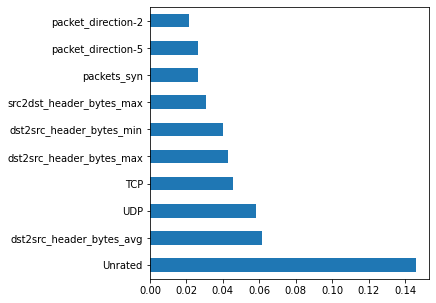

In [56]:
#selecting most importent 10 feature
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [27]:

from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [28]:
xtrain.shape

(10364, 198)

In [29]:
from sklearn.svm import SVC
svmclfr=SVC()
svmclfr.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=svmclfr.predict(xtest)
print("Confusion Matrix:")
print("  ")
print(confusion_matrix(ytest,y_pred))
print("---------------")
print("  ")
print("Accuracy Score:")
print("  ")
print(accuracy_score(ytest,y_pred))
print("  ")
print("---------------")
print("  ")
print("Classification Report:")
print("  ")
print(classification_report(ytest,y_pred))

Confusion Matrix:
  
[[1556    2]
 [ 700  333]]
---------------
  
Accuracy Score:
  
0.7290621381705905
  
---------------
  
Classification Report:
  
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      1558
           1       0.99      0.32      0.49      1033

    accuracy                           0.73      2591
   macro avg       0.84      0.66      0.65      2591
weighted avg       0.81      0.73      0.68      2591



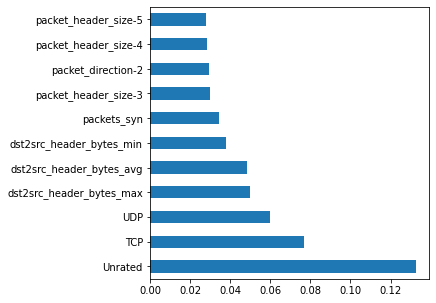

In [31]:
#selecting most importent 11 feature
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(11).plot(kind='barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [33]:
xtrain.shape

(9068, 198)

In [34]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=svm_model.predict(xtest)
print("Confusion Matrix:")
print("  ")
print(confusion_matrix(ytest,y_pred))
print("---------------")
print("  ")
print("Accuracy Score:")
print("  ")
print(accuracy_score(ytest,y_pred))
print("  ")
print("---------------")
print("  ")
print("Classification Report:")
print("  ")
print(classification_report(ytest,y_pred))

Confusion Matrix:
  
[[2359    6]
 [1080  442]]
---------------
  
Accuracy Score:
  
0.7206071520452791
  
---------------
  
Classification Report:
  
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      2365
           1       0.99      0.29      0.45      1522

    accuracy                           0.72      3887
   macro avg       0.84      0.64      0.63      3887
weighted avg       0.80      0.72      0.67      3887



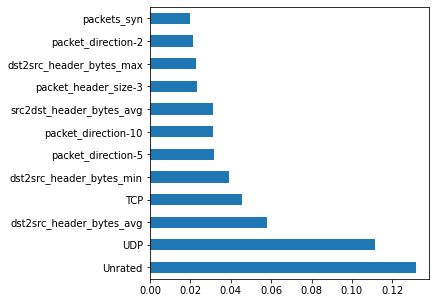

In [36]:
#selecting most importent 12 feature
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(12).plot(kind='barh')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [38]:
xtrain.shape

(9068, 198)

In [39]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=svm_model.predict(xtest)
print("Confusion Matrix:")
print("  ")
print(confusion_matrix(ytest,y_pred))
print("---------------")
print("  ")
print("Accuracy Score:")
print("  ")
print(accuracy_score(ytest,y_pred))
print("  ")
print("---------------")
print("  ")
print("Classification Report:")
print("  ")
print(classification_report(ytest,y_pred))

Confusion Matrix:
  
[[2359    6]
 [1080  442]]
---------------
  
Accuracy Score:
  
0.7206071520452791
  
---------------
  
Classification Report:
  
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      2365
           1       0.99      0.29      0.45      1522

    accuracy                           0.72      3887
   macro avg       0.84      0.64      0.63      3887
weighted avg       0.80      0.72      0.67      3887



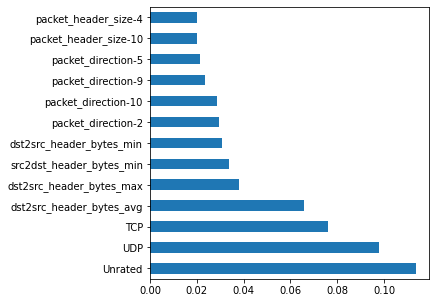

In [41]:
#selecting most importent 13 feature
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(13).plot(kind='barh')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [43]:
xtrain.shape

(9068, 198)

In [44]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=svm_model.predict(xtest)
print("Confusion Matrix:")
print("  ")
print(confusion_matrix(ytest,y_pred))
print("---------------")
print("  ")
print("Accuracy Score:")
print("  ")
print(accuracy_score(ytest,y_pred))
print("  ")
print("---------------")
print("  ")
print("Classification Report:")
print("  ")
print(classification_report(ytest,y_pred))

Confusion Matrix:
  
[[2359    6]
 [1080  442]]
---------------
  
Accuracy Score:
  
0.7206071520452791
  
---------------
  
Classification Report:
  
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      2365
           1       0.99      0.29      0.45      1522

    accuracy                           0.72      3887
   macro avg       0.84      0.64      0.63      3887
weighted avg       0.80      0.72      0.67      3887



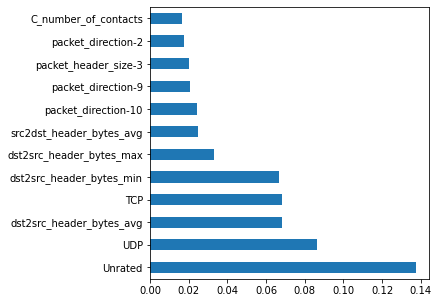

In [46]:
#selecting most importent 14 feature
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(12).plot(kind='barh')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [48]:
xtrain.shape

(9068, 198)

In [49]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=svm_model.predict(xtest)
print("Confusion Matrix:")
print("  ")
print(confusion_matrix(ytest,y_pred))
print("---------------")
print("  ")
print("Accuracy Score:")
print("  ")
print(accuracy_score(ytest,y_pred))
print("  ")
print("---------------")
print("  ")
print("Classification Report:")
print("  ")
print(classification_report(ytest,y_pred))

Confusion Matrix:
  
[[2359    6]
 [1080  442]]
---------------
  
Accuracy Score:
  
0.7206071520452791
  
---------------
  
Classification Report:
  
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      2365
           1       0.99      0.29      0.45      1522

    accuracy                           0.72      3887
   macro avg       0.84      0.64      0.63      3887
weighted avg       0.80      0.72      0.67      3887



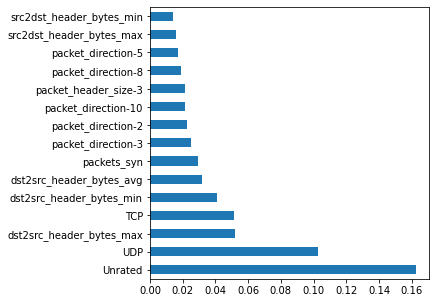

In [51]:
#selecting most importent 15 feature
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [53]:
xtrain.shape

(9068, 198)

In [54]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=svm_model.predict(xtest)
print("Confusion Matrix:")
print("  ")
print(confusion_matrix(ytest,y_pred))
print("---------------")
print("  ")
print("Accuracy Score:")
print("  ")
print(accuracy_score(ytest,y_pred))
print("  ")
print("---------------")
print("  ")
print("Classification Report:")
print("  ")
print(classification_report(ytest,y_pred))

Confusion Matrix:
  
[[2359    6]
 [1080  442]]
---------------
  
Accuracy Score:
  
0.7206071520452791
  
---------------
  
Classification Report:
  
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      2365
           1       0.99      0.29      0.45      1522

    accuracy                           0.72      3887
   macro avg       0.84      0.64      0.63      3887
weighted avg       0.80      0.72      0.67      3887

